In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


repertoire_courant=os.getcwd()
print(repertoire_courant)
print("chargement des données")
Df=pd.read_csv(repertoire_courant+r'\T2_snowfox_lf.dat',header=1,skiprows=lambda x: x in [2, 3])
#Df=pd.read_csv(repertoire_courant+r'\T2_snowfox_lf.dat',header=1,skiprows=lambda x: x in [2, 3])
print("fait")
#print(Df)
#print(Df['TIMESTAMP'])
#print(Df.dtypes)

tmin_serie=np.datetime64('2023-08-18 00:00:00')
tmax_serie=np.datetime64('2023-09-09 12:00:00')
date = pd.to_datetime(Df['TIMESTAMP'],format='mixed')
#print(Df.columns[1])
series={}
for variables in Df.columns:
    if variables in ['TIMESTAMP','RECORD','Batt_Min'] : pass
    else : 
        series[variables]=pd.Series(Df[variables].astype('float64').values,index=date,name=variables).truncate(before=tmin_serie, after=tmax_serie)
        #series[variables]=pd.Series(Df[variables].astype('float64').values,index=date,name=variables)
    
serie_T=pd.Series(Df['Tair_1_Avg'].values,index=date)
#print(date)
#print(series)
#print(series['Press_Avg'])

C:\Users\evanl\Documents\Stage IGE
chargement des données
fait


In [2]:
print(Df)

                TIMESTAMP  RECORD  Batt_Min  PTemp_Avg  Tair_1_Avg  \
0     2023-08-17 11:40:00       0     12.41      10.52       9.410   
1     2023-08-17 11:50:00       1     12.40      10.47       9.630   
2     2023-08-17 12:00:00       2     12.37      10.22       9.010   
3     2023-08-17 12:10:00       3     12.41      10.08      10.210   
4     2023-08-17 12:20:00       4     12.36      10.38       8.700   
...                   ...     ...       ...        ...         ...   
5886  2023-09-27 09:30:00    5886     14.61       7.85       7.529   
5887  2023-09-27 09:40:00    5887     14.59       8.45       7.972   
5888  2023-09-27 09:50:00    5888     14.59       9.06       8.100   
5889  2023-09-27 10:00:00    5889     14.54       9.62       8.450   
5890  2023-09-27 10:10:00    5890     14.55      10.14       7.437   

      Tair_2_Avg  Hum_1_Avg  Hum_2_Avg  SWin_Avg  SWout_Avg  ...  LWinCor_Avg  \
0          10.65      53.24      49.17  446.9623   108.4885  ...     322.4072 

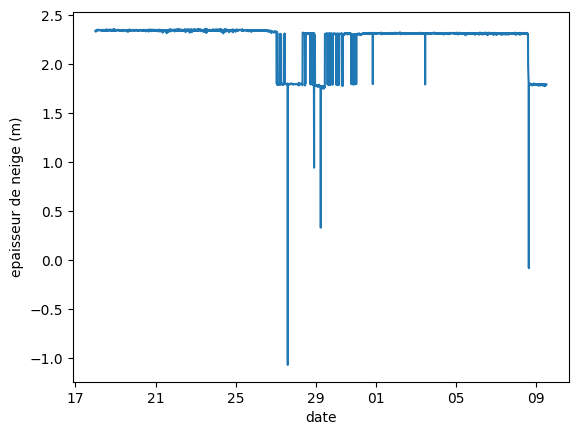

In [3]:
fig=plt.figure()
ax = fig.add_subplot(111)
date_format=mpl.dates.DateFormatter("%d")
ax.plot(series['Snow_Depth'])
ax.set_xlabel('date')
ax.set_ylabel('epaisseur de neige (m)')
ax.xaxis.set_major_formatter(date_format)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([742., 119.,  56., 103., 572., 896., 195., 147., 118., 288.]),
 array([  0.  ,  35.93,  71.86, 107.79, 143.72, 179.65, 215.58, 251.51,
        287.44, 323.37, 359.3 ]),
 <BarContainer object of 10 artists>)

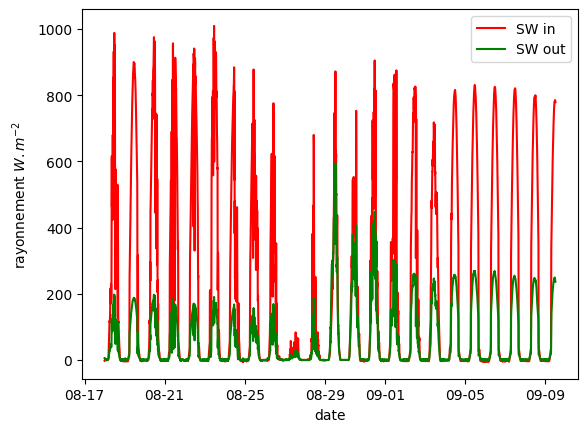

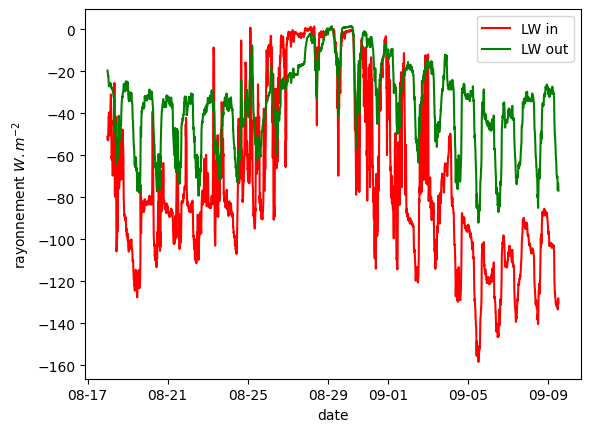

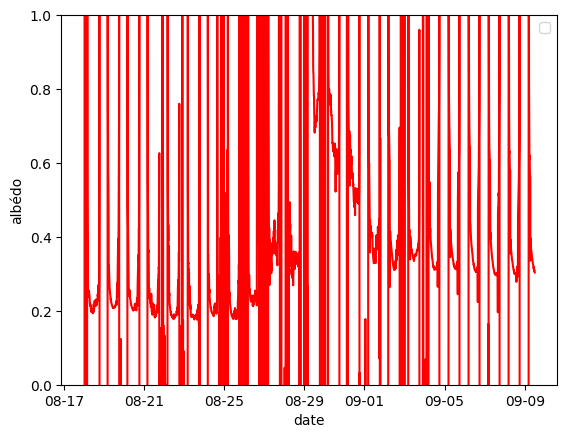

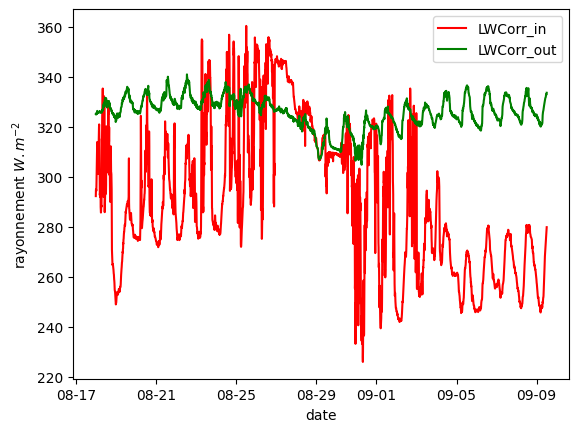

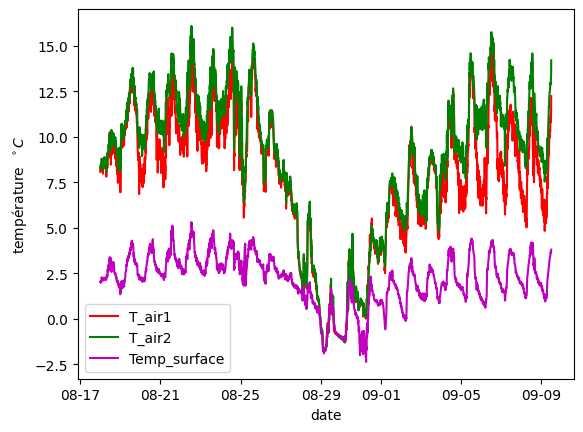

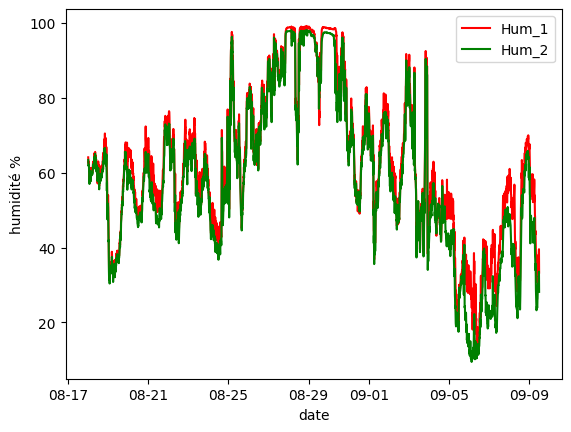

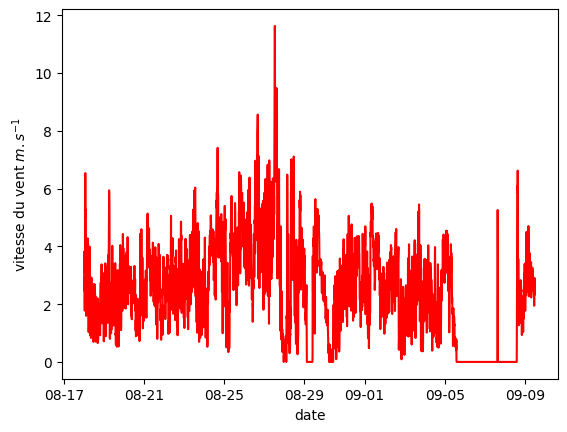

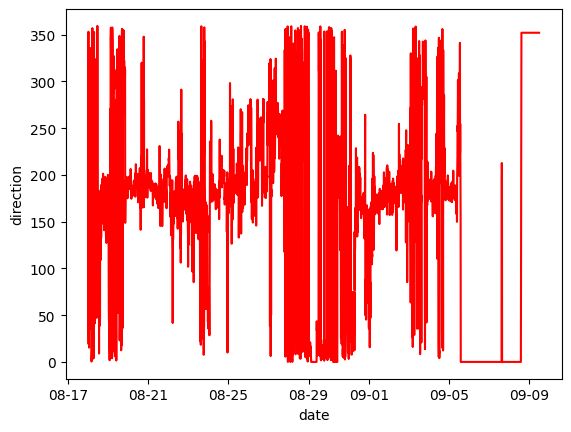

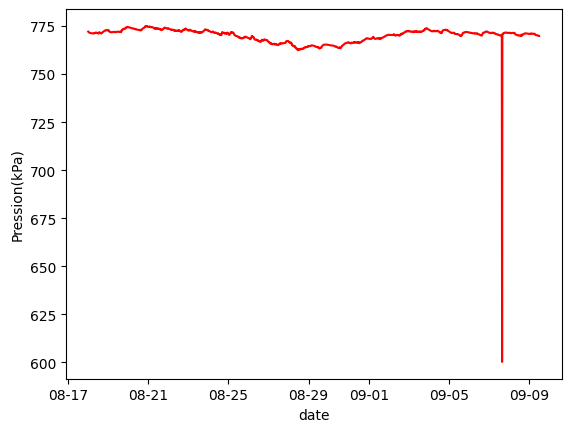

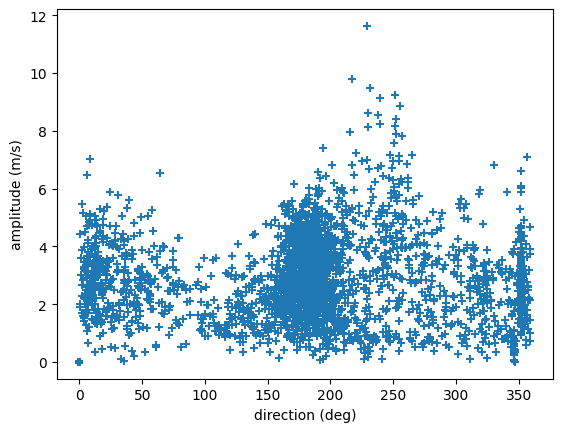

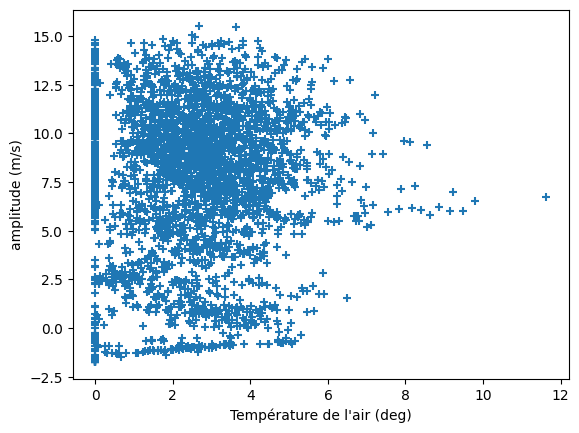

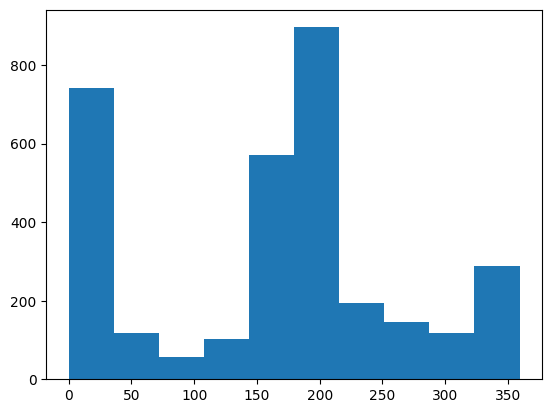

In [4]:

date_format=mpl.dates.DateFormatter("%m-%d")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['SWin_Avg'],color='r',label='SW in')
ax.plot(series['SWout_Avg'],color='g',label='SW out')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('rayonnement $W.m^{-2}$')

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['LWin_Avg'],color='r',label='LW in')
ax.plot(series['LWout_Avg'],color='g',label='LW out')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('rayonnement $W.m^{-2}$')


fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['SWout_Avg']/series['SWin_Avg'],color='r')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('albédo')
ax.set_ylim(bottom=0,top=1)
#application des corrections manuellement
sigma=5.670374419e-8
serie_Tcapteur=series['CNR4TC_Avg']
serie_LT=sigma*(273.15+serie_Tcapteur)**4
serie_LWCorrIn=series['LWin_Avg']+serie_LT
serie_LWCorrOut=series['LWout_Avg']+serie_LT
serie_Temp_sol=(serie_LWCorrOut/sigma)**0.25-273.15#en degrés celsius

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(serie_LWCorrIn,color='r',label='LWCorr_in')
ax.plot(serie_LWCorrOut,color='g',label='LWCorr_out')
#ax.plot(series['LWinCor_Avg'],color='r',label='LW Corr in')
#ax.plot(series['LWoutCor_Avg'],color='g',label='LW Corr out')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('rayonnement $W.m^{-2}$')
#fig.savefig("LW_17-08_09-09.png")
"""
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['LWinCor_Avg'],color='r',label='LW Corr in')
ax.plot(series['LWoutCor_Avg'],color='g',label='LW Corr out')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('rayonnement $W.m^{-2}$')
"""

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['Tair_1_Avg'],color='r',label='T_air1')
ax.plot(series['Tair_2_Avg'],color='g',label='T_air2')
ax.plot(serie_Temp_sol,color='m',label='Temp_surface')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel(r"température  $^\circ C $ ")
#fig.savefig("Température_17-08_09-09.png")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['Hum_1_Avg'],color='r',label='Hum_1')
ax.plot(series['Hum_2_Avg'],color='g',label='Hum_2')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel("humidité %")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['Wspeed'],color='r')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('date')
ax.set_ylabel("vitesse du vent $m.s^{-1}$")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['Wdir'],color='r')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('date')
ax.set_ylabel("direction")


fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['Press_Avg'],color='r')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('date')
ax.set_ylabel("Pression(kPa)")

fig=plt.figure()
plt.scatter(series['Wdir'].values,series['Wspeed'].values,marker='+')
plt.xlabel("direction (deg)")
plt.ylabel("amplitude (m/s)")


fig=plt.figure()
plt.scatter(series['Wspeed'].values,series['Tair_1_Avg'].values,marker='+')
plt.xlabel("Température de l'air (deg)")
plt.ylabel("amplitude (m/s)")

fig=plt.figure()
plt.hist(series['Wdir'].values)

In [5]:
date_format=mpl.dates.DateFormatter("%m-%d")
#conversion de l'Humidité relative en humidité spécifique
def P_sat(T):
    "retourne la pression de vapeur saturante en Pa (cf Charrondiere), pour une température T en K"
    return 611.0*np.exp(((2.5e6)/462.0)*(1.0/273.15-1.0/T))
def q_sat(T,P):
    "retourne l'humidité spécifique à saturation (RH=100%)"
    #T : K, P: Pa
    return 0.622*P_sat(T)/P
def q(T,P,RH):
    "retourne humidité spécifique"
    #T: en K, P: en Pa, RH : en %
    return 0.622*P_sat(T)*0.01*RH/P
serie_RH=series['Hum_1_Avg'].copy()
serie_T=series['Tair_1_Avg'].copy()+273.15
serie_q=q(serie_T,100.0*series['Press_Avg'],serie_RH)
serie_qsat=q_sat(serie_T,100.0*series['Press_Avg'])
"""
plt.plot(serie_q,color='r',label='q')
plt.plot(serie_qsat,color='b',label='q_sat')
plt.legend()
"""
P=771
T=20
RH=80
Hum_spe=q(T+273.15,100.0*P,RH)
Ts=(273.15)*(1.0+0.61*Hum_spe)
print(f"P = {P} hPa")
print(f"T = {T} deg C")
print(f"T = {T+273.15} K")
print(f"RH = {RH} %")
print(f"q = {Hum_spe} g/kg")
print(f"Ts {Ts} K")

P = 771 hPa
T = 20 deg C
T = 293.15 K
RH = 80 %
q = 0.015235068453410959 g/kg
Ts 275.68848995831 K


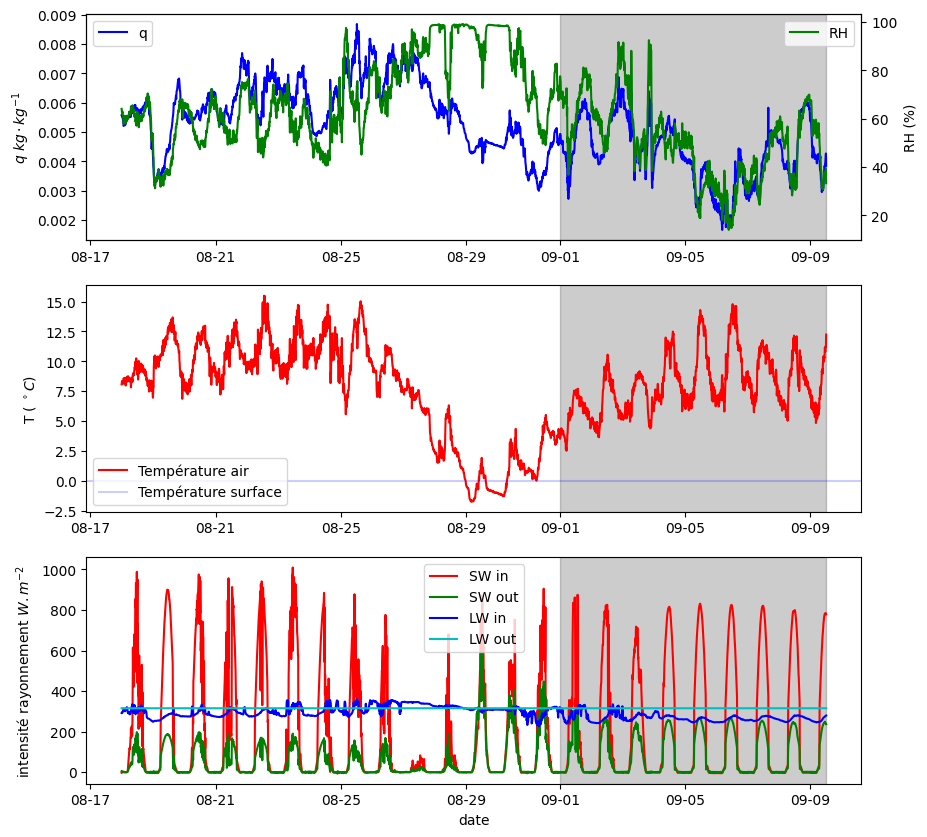

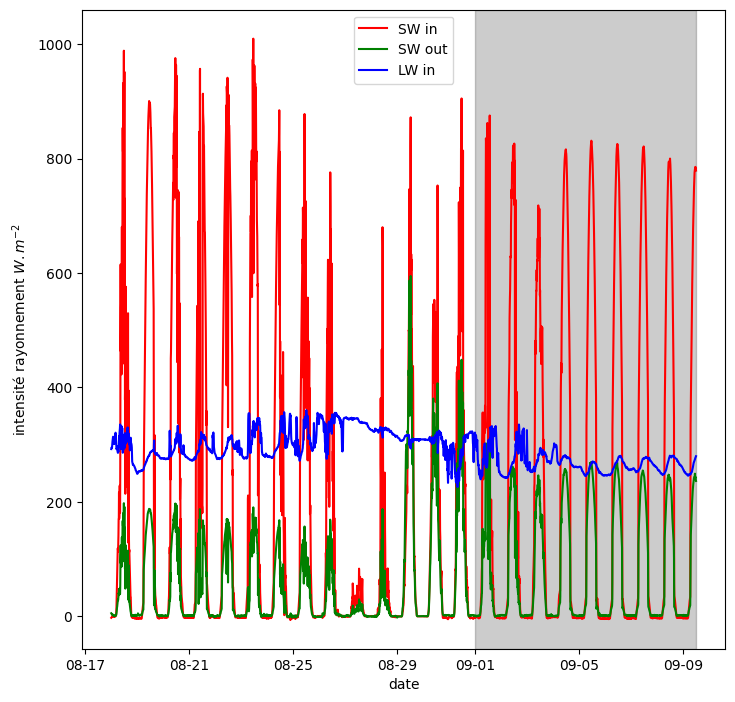

In [6]:
#regroupement des graphiques
date_min=np.datetime64("2023-09-01 00:00:00")
date_max=tmax_serie
#date_format=mpl.dates.DateFormatter("%H-%M")
date_format=mpl.dates.DateFormatter("%m-%d")
repertoire_figures=repertoire_courant+r"\figures"+r"\\"
fig=plt.figure(figsize=(10,10))

ax1 = plt.subplot(311)
ax1_bis=ax1.twinx()
ax1.plot(serie_q,color='b',label="q")
ax1_bis.plot(series['Hum_1_Avg'],color='g',label="RH")
#ax1.plot(serie_qsat,color='r',label="q_sat")
ax1.set_ylabel(r"$q$ $kg\cdot kg^{-1}$")
ax1_bis.set_ylabel(r"RH (%)")
ax1.xaxis.set_major_formatter(date_format)
ax1.axvspan(date_min,date_max,color='k',alpha=0.2)
ax1.legend()
ax1_bis.legend()


#ax1.set_xlim(date_min,date_max)
ax2 = plt.subplot(312)
ax2.plot(series['Tair_1_Avg'],color='r',label='Température air')
#ax2.plot(serie_Temp_sol,color='g',label='Température surface')
ax2.set_ylabel(r"T ( $^\circ C $)")
ax2.xaxis.set_major_formatter(date_format)
ax2.axvspan(date_min,date_max,color='k',alpha=0.2)
ax2.axhline(y=0.0,color='b',alpha=0.2, label='Température surface')
ax2.legend()

ax3 = fig.add_subplot(313)
ax3.plot(series['SWin_Avg'],color='r',label='SW in')
ax3.plot(series['SWout_Avg'],color='g',label='SW out')
ax3.plot(series['LWinCor_Avg'],color='b',label='LW in')
ax3.plot(series['LWinCor_Avg'].index.values,sigma*(273.15)**4*np.ones(series['LWinCor_Avg'].index.values.size),color='c',label='LW out')
ax3.xaxis.set_major_formatter(date_format)
#ax3.set_xlim(date_min,date_max)
ax3.legend()
ax3.set_xlabel('date')
ax3.set_ylabel('intensité rayonnement $W.m^{-2}$')
ax3.axvspan(date_min,date_max,color='k',alpha=0.2)

plt.savefig(repertoire_figures+"meteo_Hum_T.png")
#ax2.set_xlim(date_min,date_max)
fig=plt.figure(figsize=(8.3,8.3))
ax3 = fig.add_subplot(111)
ax3.plot(series['SWin_Avg'],color='r',label='SW in')
ax3.plot(series['SWout_Avg'],color='g',label='SW out')
ax3.plot(series['LWinCor_Avg'],color='b',label='LW in')
ax3.xaxis.set_major_formatter(date_format)
#ax3.set_xlim(date_min,date_max)
ax3.legend()
ax3.set_xlabel('date')
ax3.set_ylabel('intensité rayonnement $W.m^{-2}$')
ax3.axvspan(date_min,date_max,color='k',alpha=0.2)
#plt.savefig(repertoire_figures+r"\meteo_LW_SW.png")

Text(0, 0.5, 'direction')

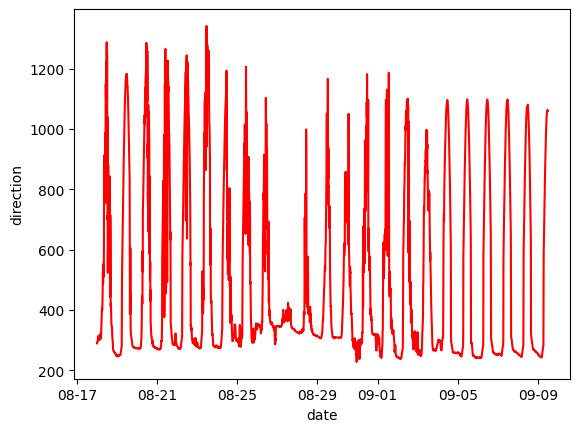

In [7]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series['LWinCor_Avg']+series['SWin_Avg'],color='r')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('date')
ax.set_ylabel("direction")


C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


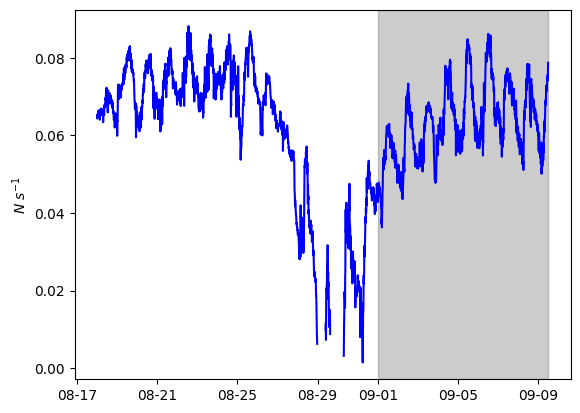

In [8]:
#periode de Brunt Vaisala
serie_N=1.0/(2.0*np.pi)*(np.sqrt(9.81*(series['Tair_1_Avg'])/(1.72*(273.15+series['Tair_1_Avg']))))
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(serie_N,color='b')
ax.set_ylabel(r"$N$ $s^{-1}$")
ax.xaxis.set_major_formatter(date_format)
ax.axvspan(date_min,date_max,color='k',alpha=0.2)


In [9]:
P=771
T=20
RH=80
print(f"P = {P} hPa")
print(f"T = {T} deg C")
print(f"RH = {RH} %")
Q=q(T+273.15,100.0*P,RH)
print(f"q = {Q} g/kg")
Tv=(T+273.15)*(1+0.32*Q)-273.15
print(f"Tv={Tv} deg")

P = 771 hPa
T = 20 deg C
RH = 80 %
q = 0.015235068453410959 g/kg
Tv=21.429171301477595 deg


Text(0, 0.5, '$LW_{in}+SW_{in}$ ($W \\cdot m^{-2}$)')

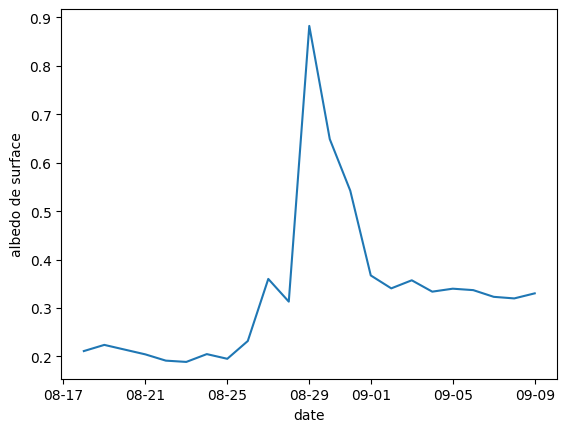

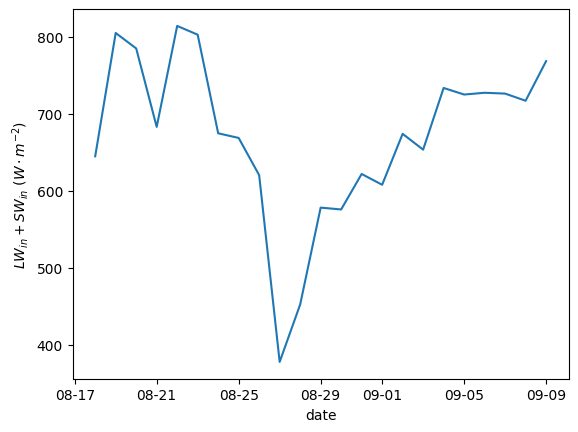

In [10]:
#Calcul de l'albédo de surface
#On calcule SW_Out/SW_In, en prenant la moyenne sur 24H
#Toutes les valeurs inférieures à 10W/m^2 sont rejetées

serie_SWin=series['SWin_Avg'].resample('1H').mean()
serie_SWout=series['SWout_Avg'].resample('1H').mean()
serie_Rtot=(series['LWinCor_Avg']+series['SWin_Avg']).resample('1H').mean()
serie_SWin_copy=serie_SWin.copy()
serie_SWout_copy=serie_SWout.copy()
seuil=10.0

for i in range(0,serie_SWin.values.size):
    if (serie_SWin_copy.values[i] <= seuil) and (serie_SWout_copy.values[i] <= seuil):
        serie_SWin_copy.values[i]=np.NaN
        serie_SWout_copy.values[i]=np.NaN
        serie_Rtot.values[i]=np.NaN
serie_SWin_copy=serie_SWin_copy.resample('24H').mean()
serie_SWout_copy=serie_SWout_copy.resample('24H').mean()
serie_Rtot=serie_Rtot.resample('24H').mean()


serie_albedo=serie_SWout_copy/serie_SWin_copy
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(serie_albedo)
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('date')
ax.set_ylabel("albedo de surface")
plt.savefig(repertoire_courant+r"\figures"+r"\albedo.png")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(serie_Rtot)
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('date')
ax.set_ylabel(r"$LW_{in}+SW_{in}$ ($W \cdot m^{-2}$)")

trace gradient de température potentielle :
$$\frac{1}{\theta}\frac{\partial \theta}{\partial z} \approx$$

Text(0, 0.5, 'direction °')

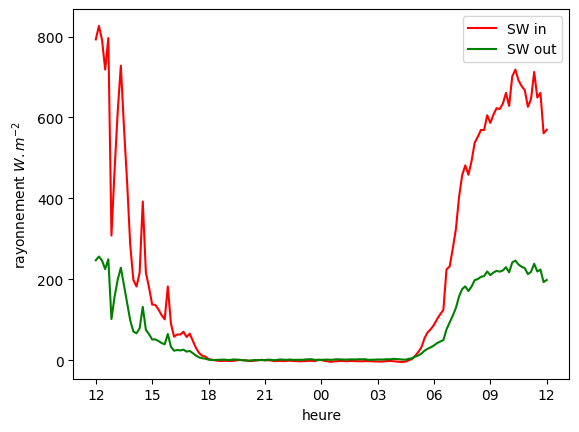

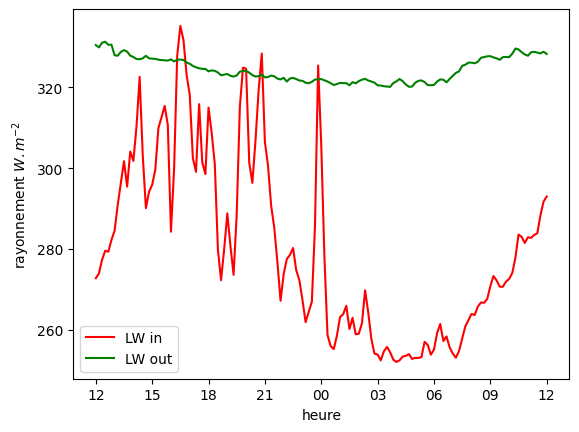

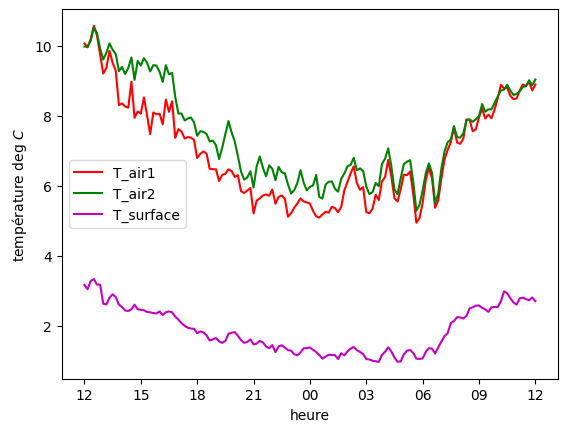

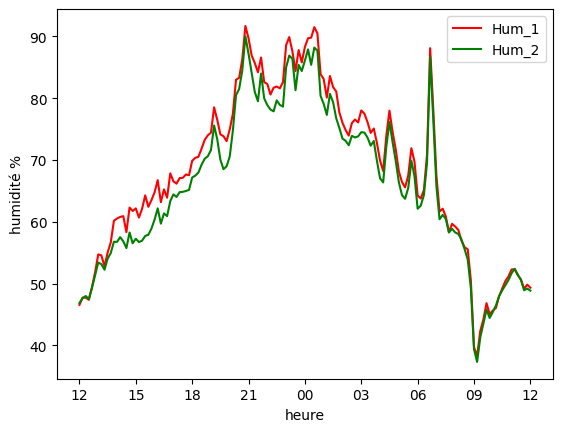

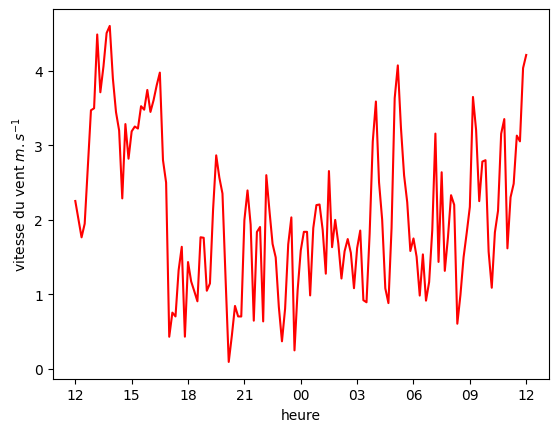

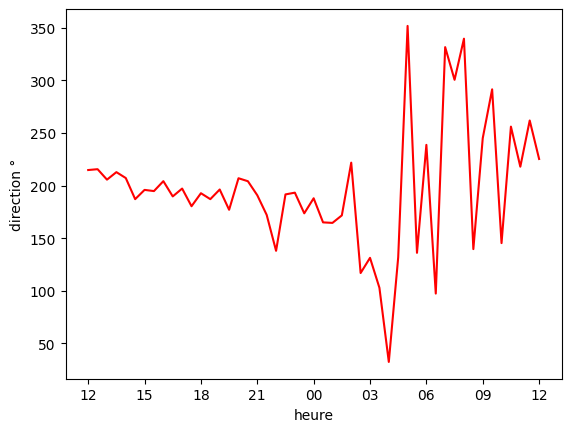

In [11]:
tmin_trunc=np.datetime64('2023-09-02 12:00:00')
import copy
tmax_trunc=np.datetime64('2023-09-03 12:00:00')
series_trunc=copy.deepcopy(series)
for variable in series:
    series_trunc[variable]=series[variable].truncate(before=tmin_trunc,after=tmax_trunc)
date_format=mpl.dates.DateFormatter("%H")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series_trunc['SWin_Avg'],color='r',label='SW in')
ax.plot(series_trunc['SWout_Avg'],color='g',label='SW out')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('heure')
ax.set_ylabel('rayonnement $W.m^{-2}$')

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series_trunc['LWinCor_Avg'],color='r',label='LW in')
ax.plot(series_trunc['LWoutCor_Avg'],color='g',label='LW out')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('heure')
ax.set_ylabel('rayonnement $W.m^{-2}$')
#fig.savefig("LW_24-25-aout.png")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series_trunc['Tair_1_Avg'],color='r',label='T_air1')
ax.plot(series_trunc['Tair_2_Avg'],color='g',label='T_air2')
ax.plot(serie_Temp_sol.truncate(before=tmin_trunc,after=tmax_trunc),color='m',label='T_surface')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('heure')
ax.set_ylabel("température deg $C $ ")
#fig.savefig("température_24-25-aout.png")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series_trunc['Hum_1_Avg'],color='r',label='Hum_1')
ax.plot(series_trunc['Hum_2_Avg'],color='g',label='Hum_2')
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.set_xlabel('heure')
ax.set_ylabel("humidité %")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series_trunc['Wspeed'],color='r')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('heure')
ax.set_ylabel("vitesse du vent $m.s^{-1}$")

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(series_trunc['Wdir'].resample('30min').mean(),color='r')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('heure')
ax.set_ylabel("direction °")

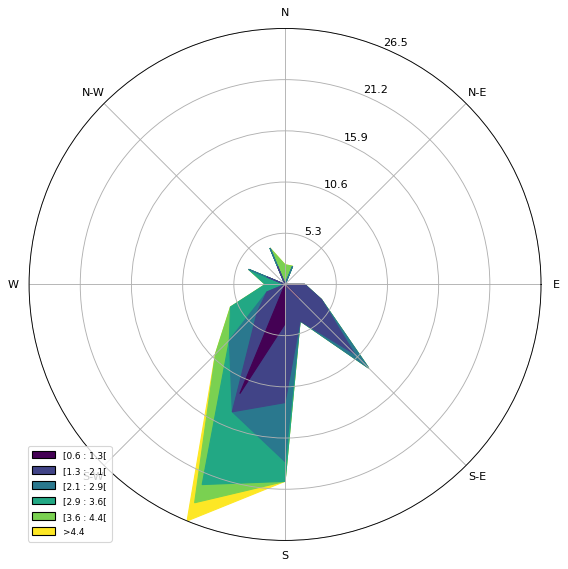

In [12]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()

ax.contourf(series_trunc['Wdir'].resample('30min').mean(), series_trunc['Wspeed'].resample('30min').mean(), normed=True,
       blowto=False, edgecolor="white")

ax.set_legend()

In [13]:
sigma=5.670374419e-8
T_surface = 273.15#K
LW_out=sigma*(T_surface**4)
print(f"T_surface = {T_surface}")
print(f"LW_out = {LW_out} W/m^2")

T_surface = 273.15
LW_out = 315.6578223008046 W/m^2
